In [1]:
### This will simulate a two state ising model on a square lattice.
### This is prototype code.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random 

### The Ising Hamiltonian:
Given small magnets held onto a lattice, $s_i = \pm 1$ is the state of $i^{th}$ magnet. The +1 state is called spin up and -1 is called spin-down. This can be thought of as North pole up or North pole down. We also further assume that these magnets are restructed to be either up or down and nothing in between. $T_{ij}$ is the interaction between spin 'i' and spin 'j'. And Finally, the second term is the interaction of any spin with the external magnetic field $h_i$. The Hamiltonian is then,

$$ E  = -\sum_{ij}T_{ij} s_i s_j + \sum_{i}h_i s_i$$

#### Generating Lattice and Calculating the energy:
Suppose we assume the space where the spins are held in place to be a square lattice. For now, let us also assume that any spins interacts with all of its neighbors. 

In [24]:
N_lattice = 10

def Random_State_Ising(N_latt):

    """ Given the width of the lattice - N_latt,
        this function initializes a Random state of spins in a N_latt X N_latt grid.
        
        - Output = N_latt X N_latt matrix with randomly placed +1 and -1. """
    
    State  =  np.random.choice([-1,1],(N_latt, N_latt))
    return State


#### What is the energy of this state?

        #- How do we define connectivity?
        #- How do we define the external magnetic field?

- We shall first play with all-to-all equally connected ising model and set the magnetic field to be uniform.

In [32]:

## we will first start with the connectivity matrix.
## This tells us which spins interact with which spins.
## Not the magnitude of interaction- just the connection.
## Multiplication of connectivity with Energy magnitude T_{ij} gives the energy

def Connectivity_matrix_all_to_all(N_latt):
    ## We can represent the connectivity as a graph of N_latt**2 X N_latt**2 symmetric matrix.
    ## Each row i gives how spin s_i is connected to all other spins. 
    ## Connection of s_i with itself is zero.
    ## Connection of s_i with any other spin is 1
    dim_connectivity = N_latt**2
    Connectivity = np.ones((dim_connectivity , dim_connectivity)) - np.diag(np.ones(dim_connectivity))
    return Connectivity


In [343]:
def Energy_without_B_ext(State, J_ij, Connectivity):
    """For any given state with a given connectivity and energy magnitude,
    - and if the external magnetic field is zero, (i.e no second term in the Hamiltonain)
    - What is the energy of of this state?"""

    Weight_of_interaction = J_ij * Connectivity
    State_vector = State.reshape(np.size(State))   ### Converts the square image to an unfurled vector
    Energy = -1*(State_vector.T) @Weight_of_interaction @ State_vector

    return Energy






In [344]:

N_lattice = 30

Random_state_begin = Random_State_Ising(N_lattice)
Random_state_begin = np.ones((N_lattice, N_lattice))
Connectivity_matrix  = Connectivity_matrix_all_to_all(N_lattice)
J_ij = -1


In [345]:
#### Onward to Markov Chain Monte Carlo:
N_steps = 3000 * int(np.sqrt(N_lattice))
Inverse_Temperature = 10
### I like saving things for later visualization.
### Of course state update could be done in place

State_array = [Random_state_begin.reshape(np.size(Random_state_begin))]
Energy_array = [Energy_without_B_ext(Random_state_begin, J_ij, Connectivity=Connectivity_matrix)]

for t in range(0, N_steps-1):
    ### Measure (or in this case remember) the current state and its energy
    State_t = State_array[t]
    Energy_t = Energy_array[t]

    ### Pick a single spin in this state.
    index_random = np.random.choice(range(0,len(State_t)),1)

    ## Then propose a flip of the spin
    Proposed_State = State_t.copy()
    Proposed_State[index_random] = State_t[index_random] * -1      ## if -1 then this becomes +1, if +1, this becomes -1

    ## Compute the energy of this new state
    Energy_of_proposed_state = Energy_without_B_ext(Proposed_State,J_ij, Connectivity_matrix)
    ## See if the energy drops with this edit.

    Delta_Energy = Energy_of_proposed_state - Energy_t

    ## Based on this, probabilistically choose to accept or reject it.
    Transition_probability =  np.exp(-1* Inverse_Temperature *Delta_Energy)

    ### Do we accept this or reject this? We need to draw from the probability above.

    Accept_reject = np.min((1, Transition_probability))

    if Accept_reject > np.random.uniform(0,1):
        ## Then we accept this proposition

        State_array.append(Proposed_State)
        Energy_array.append(Energy_of_proposed_state)
    else:
        State_array.append(State_t)
        Energy_array.append(Energy_t)

/var/folders/96/v4x7j7l958xbclr4s0d46zlw0000gn/T/ipykernel_26737/2965287059.py:29: RuntimeWarning: overflow encountered in exp
  Transition_probability =  np.exp(-1* Inverse_Temperature *Delta_Energy)


Text(0.5, 1.0, 'Final State')

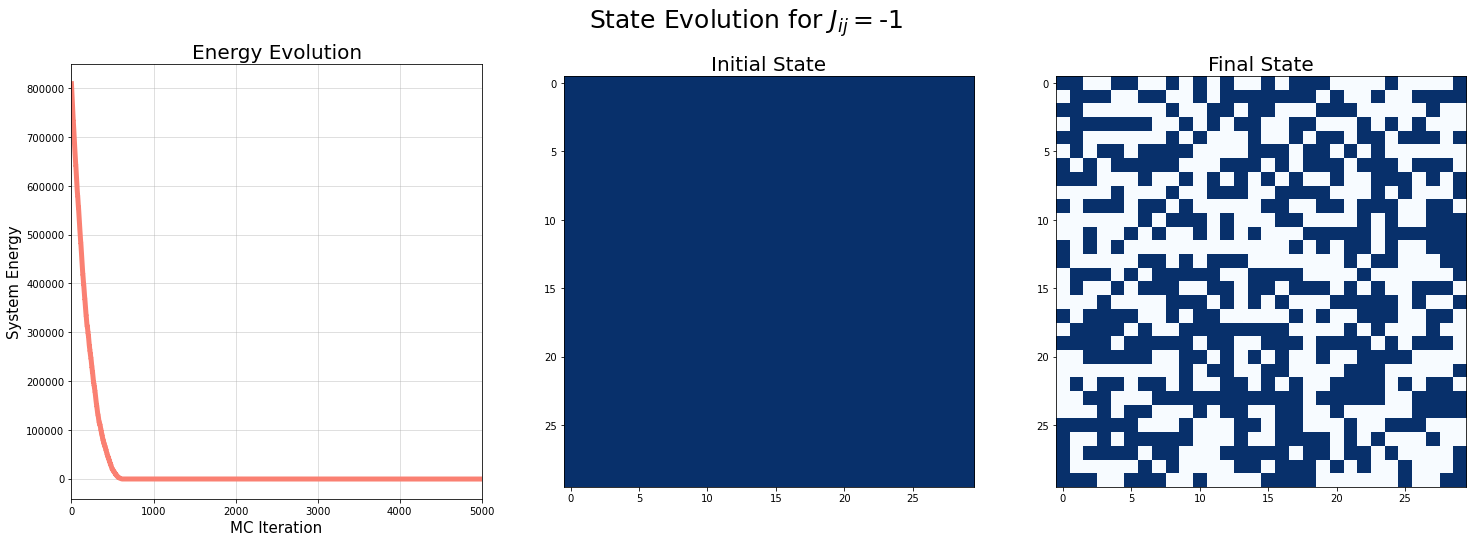

In [351]:
fig, ax = plt.subplots(1,3, figsize = (25,8))
plt.suptitle(r"State Evolution for $J_{ij}=$" + str(J_ij), fontsize = 25 )
ax[0].plot(range(0, N_steps),Energy_array, color = "salmon", linewidth = 5)
ax[0].grid(alpha = 0.5, zorder = 0)
ax[0].set_xlim(0,5000)
ax[0].set_xlabel("MC Iteration", fontsize = 15)
ax[0].set_ylabel("System Energy", fontsize = 15)
ax[0].set_title("Energy Evolution", fontsize = 20)

ax[1].imshow(State_array[0].reshape(N_lattice, N_lattice), cmap = "Blues", vmin =-1, vmax = 1)
ax[1].set_title("Initial State", fontsize =20)
ax[2].imshow(State_array[-1].reshape(N_lattice, N_lattice), cmap = "Blues",vmin =-1, vmax = 1)
ax[2].set_title("Final State",fontsize = 20)




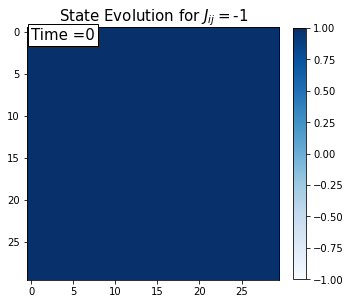

In [354]:
i = 0
plt.figure(figsize=(5,5))
plt.title(r"State Evolution for $J_{ij}=$" + str(J_ij), fontsize = 15 )
plt.imshow(State_array[i].reshape(N_lattice, N_lattice), cmap="Blues",vmin = -1, vmax = 1)
#plt.title("Random Lattice to begin", fontsize = 15)
#plt.title("Final State", fontsize = 15)
plt.text(s ="Time =" +str(i), x = 0, y = 1, color = "black",fontsize = 15,bbox=dict(facecolor='white', edgecolor='black', pad=3.50))

plt.colorbar( fraction = 0.045)



### Change this cell to code cell inorder to turn the evolution into a gif

from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure(figsize=(10,10))
camera = Camera(fig)
plt.title(r"State Evolution for $J_{ij}=$" + str(J_ij), fontsize = 25 )
for i in range(0, N_steps,100):
    state = State_array[i].reshape(N_lattice, N_lattice)
    plt.imshow(state,cmap = "Blues", vmin = -1, vmax =1)   
    plt.text(s ="Time =" +str(i), x = 0, y = 1, color = "black",fontsize = 20,bbox=dict(facecolor='white', edgecolor='black', pad=3.50))
    camera.snap()
    animation = camera.animate()

plt.show()
animation.save('Ising.gif')

Text(0.5, 1.0, 'Magnetic Field Configuration 2')

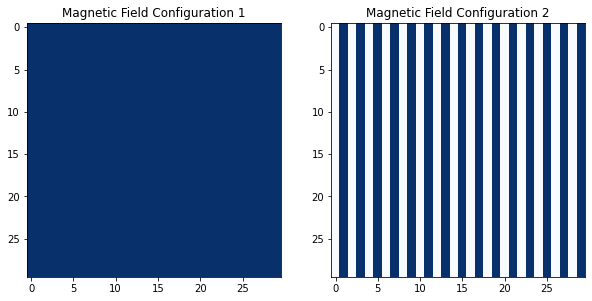

In [371]:
### What happens if there is a magnetic field?

## Let us first create the magnetic field profile.
## We can choose any arrangement of numbers between 1 and -1.
## I will create two different magnetic fields.

#1. Constant magnetic field. 

H_field_0 = np.ones((N_lattice, N_lattice))     


#2. Alternating magnetic field
H_field_1 = np.ones((N_lattice, N_lattice))  

for i in range(0,N_lattice,2):
    H_field_1[:,i] = -1*np.ones(N_lattice)


fig, ax = plt.subplots(1,2 ,figsize=(10,5))
ax[0].imshow(H_field_0, cmap = "Blues", vmin = -1, vmax = 1)
ax[0].set_title("Magnetic Field Configuration 1")
ax[1].imshow(H_field_1, cmap = "Blues", vmin = -1, vmax = 1)
ax[1].set_title("Magnetic Field Configuration 2")



In [732]:
## 
def Ext_field_energy (State,External_field= None):
    Energy =0
    if External_field.all!=None:
        N_latt = np.size(State)
        Ext_field_vct = External_field.reshape(N_latt)
        State_vct = State.reshape(N_latt)
        Energy = np.dot(Ext_field_vct, State_vct)

    return Energy



def Energy_without_B_ext(State, J_ij, Connectivity):
    """For any given state with a given connectivity and energy magnitude,
    - and if the external magnetic field is zero, (i.e no second term in the Hamiltonain)
    - What is the energy of of this state?"""

    Weight_of_interaction = J_ij * Connectivity
    State_vector = State.reshape(np.size(State))   ### Converts the square image to an unfurled vector
    Energy = -1*(State_vector.T) @Weight_of_interaction @ State_vector

    return Energy





def Total_Energy(State, J_ij, Connectivity, External_field =0):
    
    Spin_spin_interaction_energy = Energy_without_B_ext(State, J_ij,Connectivity)

    External_field_interaction_energy = Ext_field_energy(State, External_field)

    Total_Energy = Spin_spin_interaction_energy +External_field_interaction_energy

    return Total_Energy

Text(0.5, 1.0, 'Magnetic Field Configuration 2')

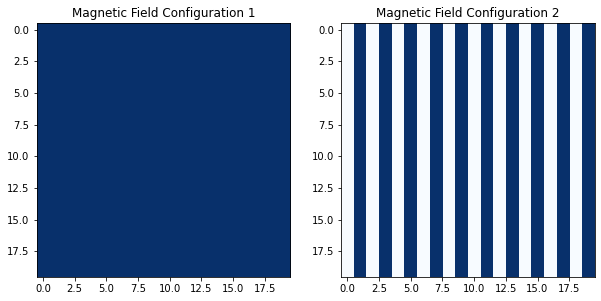

In [785]:

N_lattice = 20

Random_state_begin = Random_State_Ising(N_lattice)
#Random_state_begin = -1*np.ones((N_lattice, N_lattice))
Connectivity_matrix  = Connectivity_matrix_all_to_all(N_lattice)
J_ij = 1


### What happens if there is a magnetic field?

## Let us first create the magnetic field profile.
## We can choose any arrangement of numbers between 1 and -1.
## I will create two different magnetic fields.

#1. Constant magnetic field. 

H_field_0 = np.ones((N_lattice, N_lattice))     


#2. Alternating magnetic field
H_field_1 = np.ones((N_lattice, N_lattice))  

for i in range(0,N_lattice,2):
    H_field_1[:,i] = -1*np.ones(N_lattice)


fig, ax = plt.subplots(1,2 ,figsize=(10,5))
ax[0].imshow(H_field_0, cmap = "Blues", vmin = -1, vmax = 1)
ax[0].set_title("Magnetic Field Configuration 1")
ax[1].imshow(H_field_1, cmap = "Blues", vmin = -1, vmax = 1)
ax[1].set_title("Magnetic Field Configuration 2")


In [823]:
#### Onward to Markov Chain Monte Carlo:
Mag_field = -34.1*H_field_1
#Mag_field = np.zeros(np.shape(H_field_1))


N_steps = 3000 * int(np.sqrt(N_lattice))
Inverse_Temperature = 10
### I like saving things fow later visualization.
### Of course state update could be done in place

State_array = [Random_state_begin.reshape(np.size(Random_state_begin))]

Energy_array = [Total_Energy(Random_state_begin, J_ij, Connectivity_matrix,Mag_field)]
Magnetic_energy =[Ext_field_energy(Random_state_begin, Mag_field)]

for t in range(0, N_steps-1):
    ### Measure (or in this case remember) the current state and its energy
    State_t = State_array[t]

    Energy_t = Energy_array[t]
    Mag_energy_t = Magnetic_energy[t]

    ### Pick a single spin in this state.
    index_random = np.random.choice(range(0,len(State_t)),1)

    ## Then propose a flip of the spin
    Proposed_State = State_t.copy()
    Proposed_State[index_random] = State_t[index_random] * -1      ## if -1 then this becomes +1, if +1, this becomes -1

    ## Compute the energy of this new state
    Energy_of_proposed_state = Total_Energy(Proposed_State,J_ij, Connectivity_matrix, Mag_field)

    Magnetic_energy_of_proposed_state = Ext_field_energy(Proposed_State, Mag_field)
    ## See if the energy drops with this edit.

    Delta_Energy = Energy_of_proposed_state - Energy_t

    ## Based on this, probabilistically choose to accept or reject it.
    Transition_probability =  np.exp(-1* Inverse_Temperature *Delta_Energy)

    ### Do we accept this or reject this? We need to draw from the probability above.

    Accept_reject = np.min((1, Transition_probability))

    if Accept_reject > np.random.uniform(0,1):
        ## Then we accept this proposition

        State_array.append(Proposed_State)
        Energy_array.append(Energy_of_proposed_state)
        Magnetic_energy.append(Magnetic_energy_of_proposed_state)
    else:
        State_array.append(State_t)
        Energy_array.append(Energy_t)
        Magnetic_energy.append(Mag_energy_t)

/var/folders/96/v4x7j7l958xbclr4s0d46zlw0000gn/T/ipykernel_26737/3835690590.py:39: RuntimeWarning: overflow encountered in exp
  Transition_probability =  np.exp(-1* Inverse_Temperature *Delta_Energy)


Text(0.5, 1.0, 'Final State')

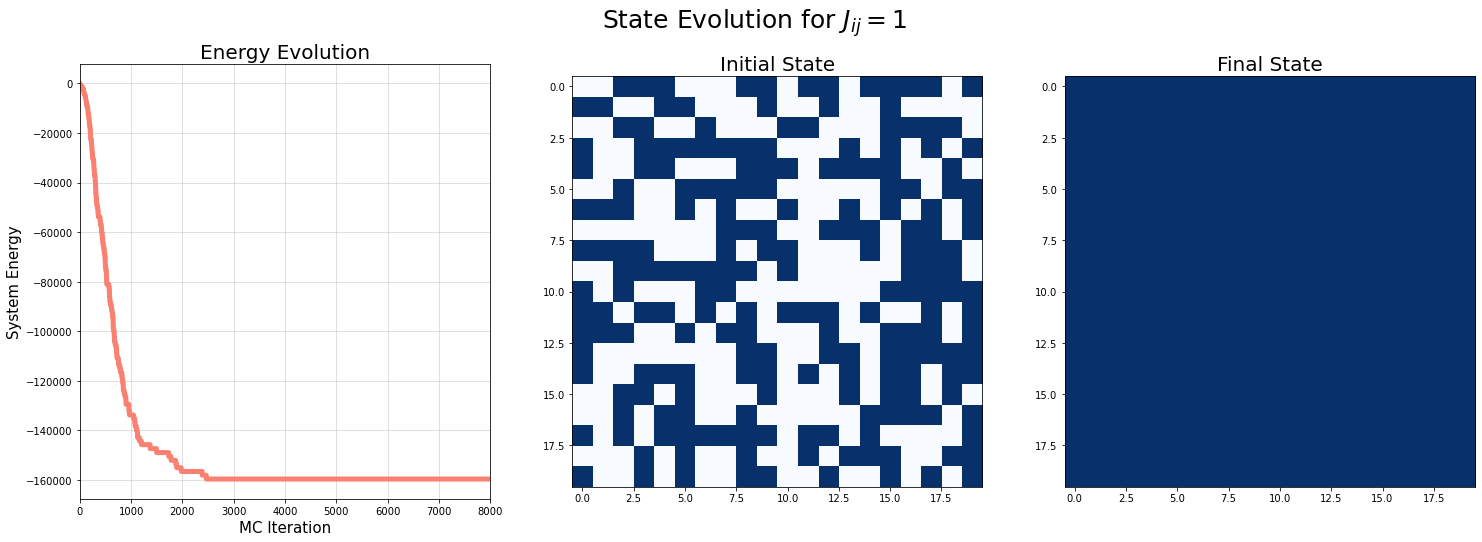

In [824]:
fig, ax = plt.subplots(1,3, figsize = (25,8))
plt.suptitle(r"State Evolution for $J_{ij}=$" + str(J_ij), fontsize = 25 )
ax[0].plot(range(0, N_steps),Energy_array, color = "salmon", linewidth = 5)
ax[0].grid(alpha = 0.5, zorder = 0)
ax[0].set_xlim(-1,8000)
ax[0].set_xlabel("MC Iteration", fontsize = 15)
ax[0].set_ylabel("System Energy", fontsize = 15)
ax[0].set_title("Energy Evolution", fontsize = 20)

ax[1].imshow(State_array[0].reshape(N_lattice, N_lattice), cmap = "Blues", vmin =-1, vmax = 1)
ax[1].set_title("Initial State", fontsize =20)
ax[2].imshow(State_array[-1].reshape(N_lattice, N_lattice), cmap = "Blues",vmin =-1, vmax = 1)
ax[2].set_title("Final State",fontsize = 20)

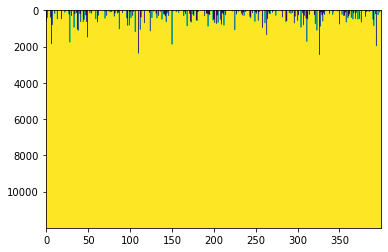

In [825]:
plt.imshow(State_array, aspect = "auto")
#plt.ylim(0,10)

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


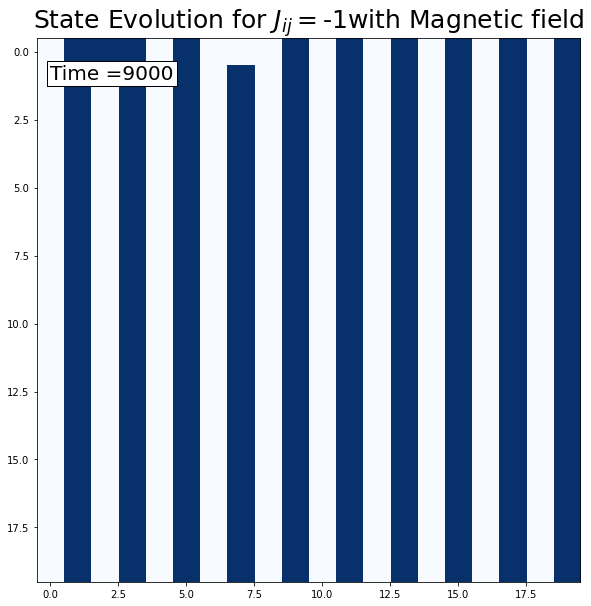

MovieWriter ffmpeg unavailable; using Pillow instead.


In [752]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure(figsize=(10,10))
camera = Camera(fig)
plt.title(r"State Evolution for $J_{ij}=$" + str(J_ij) +"with Magnetic field", fontsize = 25 )
for i in range(0, 9001,50):
    state = State_array[i].reshape(N_lattice, N_lattice)
    plt.imshow(state,cmap = "Blues", vmin = -1, vmax =1)   
    plt.text(s ="Time =" +str(i), x = 0, y = 1, color = "black",fontsize = 20,bbox=dict(facecolor='white', edgecolor='black', pad=3.50))
    camera.snap()
    animation = camera.animate()

plt.show()
animation.save('Ising_magnetic_field.gif')

Text(0.5, 1.0, 'Energy Evolution')

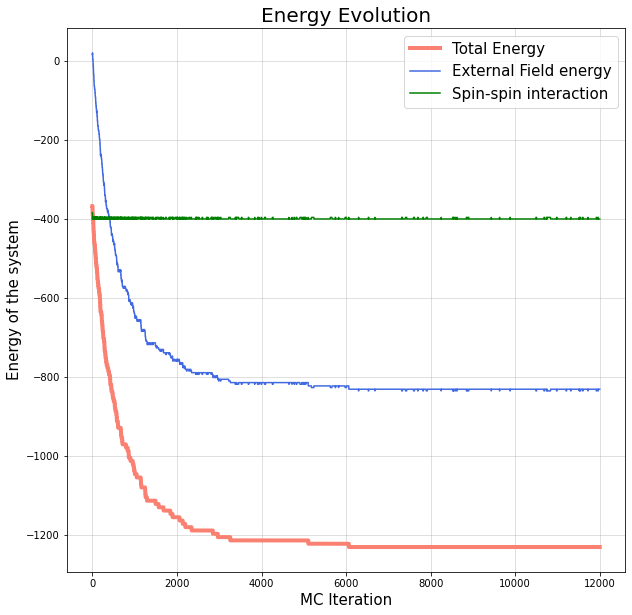

In [776]:
plt.figure(figsize=(10,10))
plt.plot(Energy_array, color = "salmon", linewidth = 4, label = "Total Energy")
plt.plot(Magnetic_energy, color = "royalblue", label = "External Field energy")
plt.plot(np.array(Energy_array)-np.array(Magnetic_energy), color = "green", label = "Spin-spin interaction")
plt.grid(alpha = 0.5, zorder = 0)
plt.legend(fontsize = 15)
plt.xlabel("MC Iteration", fontsize = 15)
plt.ylabel("Energy of the system", fontsize = 15)
plt.title("Energy Evolution", fontsize = 20)

Text(0.5, 1.0, 'Magnetic Field Profile')

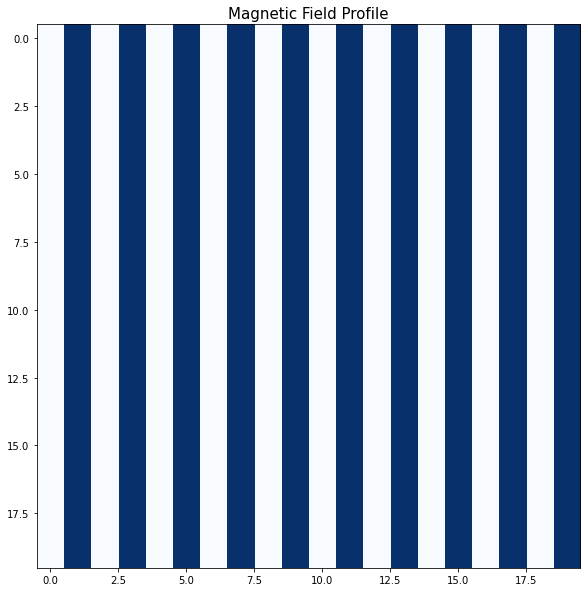

In [784]:
plt.figure(figsize=(10,10))
plt.imshow(H_field_1, cmap = "Blues")
plt.title("Magnetic Field Profile", fontsize = 15)